In [23]:
#general
import io

# data
import numpy as np
import pandas as pd

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
training_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")
training_df = training_df[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

In [25]:
    print('Read dataset completed successfully.')
    print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
    print(training_df.head(200))

Read dataset completed successfully.
Total number of rows: 31694


     TRIP_MILES  TRIP_SECONDS   FARE                       COMPANY  \
0          2.57          2341  31.99                     Flash Cab   
1          1.18          1074   9.75                     Flash Cab   
2          1.29          1173  10.25                      Sun Taxi   
3          3.70          3360  23.75       Choice Taxi Association   
4          1.15          1044  10.00                     Flash Cab   
..          ...           ...    ...                           ...   
195        1.13           821   9.00  Blue Ribbon Taxi Association   
196        0.57           414   6.00                     Flash Cab   
197        1.22           886   9.00                  City Service   
198        1.68          1219   9.00                      Sun Taxi   
199        0.71           515   6.50                      Sun Taxi   

    PAYMENT_TYPE  TIP_RATE  
0         Mobile       6.3  
1    Credit Card      27.9  
2    

In [26]:
    # View dataset statistics
    print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
    training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [27]:
    # What is the maximum fare?
    max_fare = training_df['FARE'].max()
    print("What is the maximum fare? \t\t\t\t\t\tAnswer: ${fare:.2f}".format(fare=max_fare))

    # What is the mean distance across all trips?
    mean_distance = training_df['TRIP_MILES'].mean()
    print("What is the mean distance across all trips? \tAnswer: {mean:.4f} miles".format(mean=mean_distance))

    # How many cab companies are in the dataset?
    num_unique_companies = training_df['COMPANY'].nunique()
    print("How many cab companies are in the dataset? \t\tAnswer: {number}".format(number=num_unique_companies))

    # What is the most frequent payment type?
    most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
    print("What is the most frequent payment type? \t\tAnswer: {type}".format(type=most_freq_payment_type))

    # Are any features missing data?
    missing_values = training_df.isnull().sum().sum()
    print("Are any features missing data? \t\t\t\t\tAnswer:", "No\n" if missing_values == 0 else "Yes\n")

What is the maximum fare? 						Answer: $159.25
What is the mean distance across all trips? 	Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 					Answer: No



In [28]:
    # View correlation matrix
    print(training_df.corr(numeric_only=True))

              TRIP_MILES  TRIP_SECONDS      FARE  TIP_RATE
TRIP_MILES      1.000000      0.800855  0.975344 -0.049594
TRIP_SECONDS    0.800855      1.000000  0.830292 -0.084294
FARE            0.975344      0.830292  1.000000 -0.070979
TIP_RATE       -0.049594     -0.084294 -0.070979  1.000000


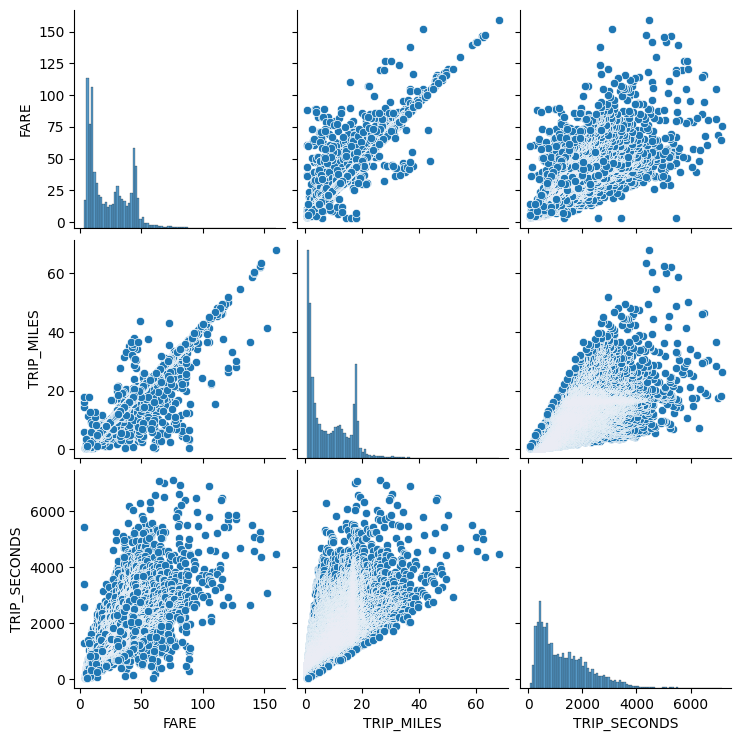

In [29]:
sns.pairplot(training_df, x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

In [30]:
def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


In [31]:
def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Most simple keras models are sequential.
  model = keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(keras.layers.Dense(units=1,
                                  input_shape=(num_features,)))

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  # input_x = df.iloc[:,1:3].values
  # df[feature]
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, df, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


INFO: starting training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20


C:\Users\cdsmi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - loss: 1806.2357 - root_mean_squared_error: 42.4881
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1243.6555 - root_mean_squared_error: 35.2534
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - loss: 794.1058 - root_mean_squared_error: 28.1601
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 439.2358 - root_mean_squared_error: 20.9329
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 193.5206 - root_mean_squared_error: 13.8783
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 52.6722 - root_mean_squared_error: 7.2221
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - loss: 15.5281 - root_mean_squared_error: 3.9302
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 12.8333 - root_mean_squared_error: 3.5733
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 14.7142 - root_mean_squared_error: 3.8322
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 12.7217 

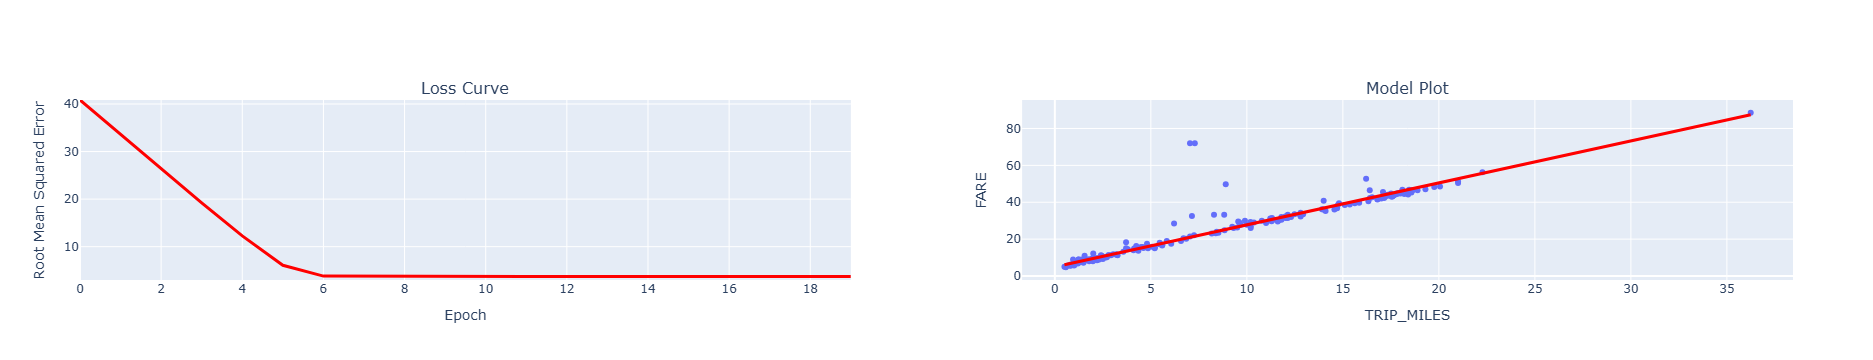

In [47]:
# Experiment 1 - Single Feature

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['TRIP_MILES']
label = 'FARE'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['TRIP_MILES', 'TRIP_SECONDS'] and label=FARE

Epoch 1/20


C:\Users\cdsmi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 303766.1562 - root_mean_squared_error: 539.1135
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.4564 - root_mean_squared_error: 8.6208
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 47.4178 - root_mean_squared_error: 6.8815
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 28.6488 - root_mean_squared_error: 5.3482
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.4477 - root_mean_squared_error: 4.2921
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.1967 - root_mean_squared_error: 3.7621
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.2149 - root_mean_squared_error: 3.7560
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.5415 - root_mean_squared_error: 3.6766
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.9508 - root_mean_squared_error: 3.7242
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.1308 - root_mean_square

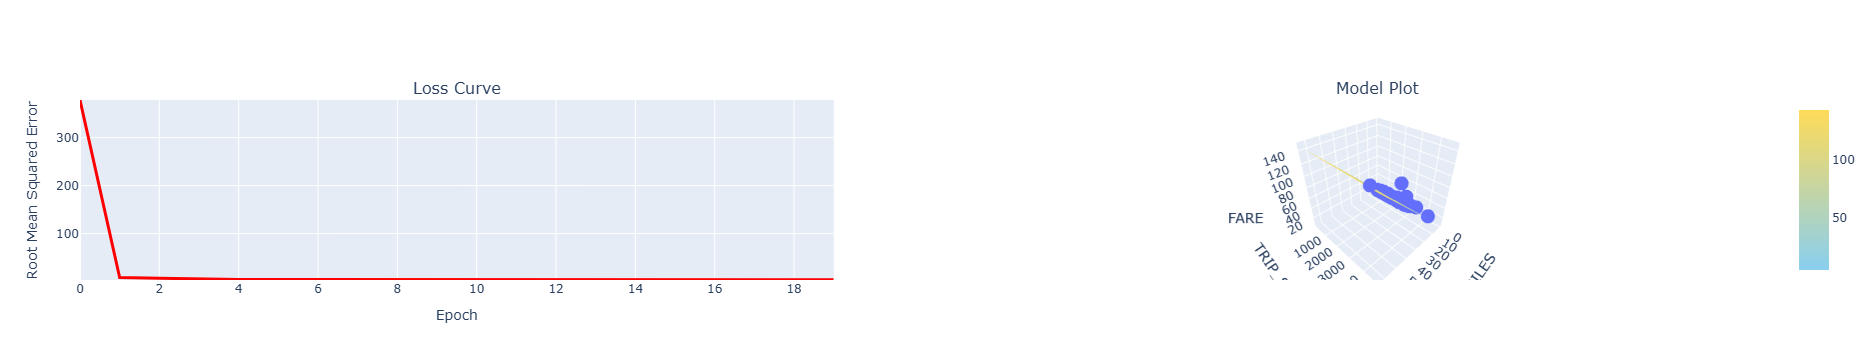

In [48]:
# Experiment 2 - Multifeature

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

training_df['TRIP_MINUTES'] = training_df['TRIP_SECONDS']/60
# Specify the feature and the label.
features = ['TRIP_MILES', 'TRIP_SECONDS']
label = 'FARE'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)